**Костина Н**
=============

Файлы data2.csv, data1.txt Объедините data.frames по идентификаторам сортов. 
Исключите те сорта, для которых есть пропущенные значения. 
Выбрать одну количественную и две качественные переменные . 
Разбить значения количественной переменной на группы в соответствии 
со значениями одной из качественных переменных. Нарисовать график, 
на котором отображены плотности распределений и гистограммы для 
получившихся групп, обозначить разные группы разными цветами. 


In [52]:
library(data.table)
library(magrittr)
library(dplyr)
library(tibble)
library(ggplot2)

Читаем данные

In [4]:
data2 <- read.csv(file = "data2.csv", sep = ",", row.names = 1, header= TRUE)
data1 <- read.csv(file ="data1.txt", sep = " ", row.names = 1, header = TRUE)

In [5]:
data2

,V_0,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,⋯,V_91,V_92,V_93,V_94,V_95,V_96,V_97,V_98,V_99,V_100
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GrowthType,0,0,0,2,2,0,0,0,0,2,⋯,2,1,1,1,1,2,1,1,2,1
Polegaemost,1,1,0,0,0,0,1,1,1,0,⋯,0,0,0,0,0,0,0,0,0,0
GenmBMatur,123,143,137,108,132,100,128,131,143,133,⋯,106,106,106,104,98,106,104,86,110,95
MaturType,5,6,5,3,5,3,5,5,6,5,⋯,3,3,3,3,2,3,3,1,3,2


In [6]:
head(data1, 5)

,Height,Protein,Oil,Productivity
,<dbl>,<dbl>,<dbl>,<int>
V_0,92.5,39.8,16.5,96
V_1,155.0,NA,NA,NA
V_2,112.5,42.1,18.3,84
V_3,77.5,43.5,17.9,109
V_4,82.5,40.8,19.4,113


Транспонируем data2

In [9]:
transpose1 <- function(data) {
  t_data <- transpose(data)
  colnames(t_data) <- rownames(data)
  rownames(t_data) <- colnames(data)
  return(t_data)
} 

t_data2 <- transpose1(data2)


head(t_data2)

,GrowthType,Polegaemost,GenmBMatur,MaturType
,<int>,<int>,<int>,<int>
V_0,0,1,123,5
V_1,0,1,143,6
V_2,0,0,137,5
V_3,2,0,108,3
V_4,2,0,132,5
V_5,0,0,100,3


Объединим и отфильтруем данные 

In [46]:
merged <- merge(t_data2, data1, by = 0, all= TRUE) %>% filter_all(all_vars(!is.na(.))) 
head(merged, 10)

,Row.names,GrowthType,Polegaemost,GenmBMatur,MaturType,Height,Protein,Oil,Productivity
,<I<chr>>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,V_0,0,1,123,5,92.5,39.8,16.5,96
2,V_100,1,0,95,2,62.5,41.8,20.9,153
3,V_11,1,0,92,2,42.5,40.7,15.1,36
4,V_12,2,2,133,5,97.5,43.1,18.4,49
5,V_13,0,0,118,4,92.5,42.6,20.2,113
6,V_14,0,2,113,4,82.5,42.4,19.5,124
7,V_17,2,0,131,5,107.5,42.7,16.7,46
8,V_19,1,0,95,2,57.5,39.8,18.3,129
9,V_2,0,0,137,5,112.5,42.1,18.3,84


Выберем две качественные и количественные переменные 

In [62]:
selected <- merged[,c("GrowthType", "MaturType", "Height")]
selected[, "GrowthType"] <- factor(selected[, "GrowthType"])
selected[, "MaturType"] <- factor(selected[, "MaturType"])
head(selected, 10)

,GrowthType,MaturType,Height
,<fct>,<fct>,<dbl>
1,0,5,92.5
2,1,2,62.5
3,1,2,42.5
4,2,5,97.5
5,0,4,92.5
6,0,4,82.5
7,2,5,107.5
8,1,2,57.5
9,0,5,112.5


Нарисовать график, на котором отображены плотности распределений и гистограммы для получившихся групп, обозначить разные группы разными цветами.

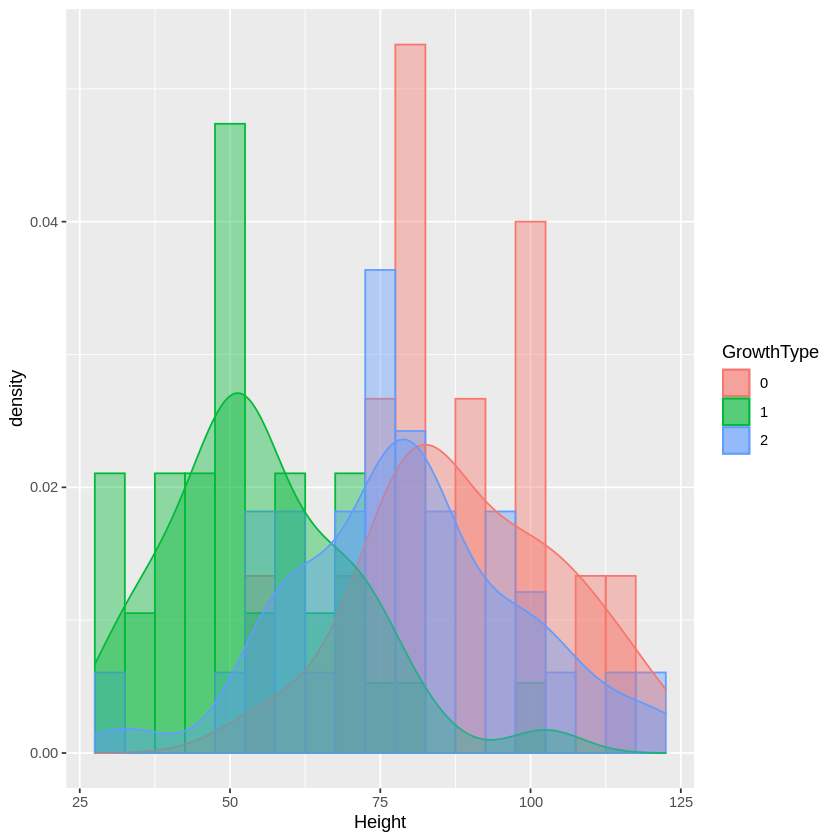

In [103]:
ggplot(selected, aes(x = Height, fill = GrowthType, color = GrowthType)) +
  geom_histogram(position = "identity", alpha = 0.4, binwidth=5, aes(y = ..density..)) +
  geom_density(alpha=0.4)